In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as random
%matplotlib inline

## Grouping of cells

- E = emf of each cell

- r = Internal resistance of each cell

- R = External resistance

- m = no. of columns

- n = no.  of rows

- current  when  cells  in  series

$$I_s=\dfrac{mE}{R+mr}$$

- current  when  cells  in  parallel

$$I_p=\dfrac{nE}{nR+r}$$

- current  when  cells  in  mixed  grouping

$$I_s=\dfrac{mnE}{nR+mr}$$

![img](cells.jpg)

- current when cells are in series

In [12]:
def cells(E,m,r,R):
    Is=m*E/(R+m*r)
    return Is
cells(12,10,5,12)

1.935483870967742

- current when cells are in parallel

In [13]:
def cells(E,n,r,R):
    Ip=n*E/(n*R+r)
    return Ip
cells(12,10,5,12)

0.96

- current when cells are in mixed grouping

In [14]:
def cells(E,m,n,r,R):
    Im=m*n*E/(n*R+m*r)
    return Im
cells(12,10,10,5,12)

7.0588235294117645

In [21]:
class groupingcells():
    def __init__(self,E,m,n,r,R):
        self.E=E
        self.m=m
        self.n=n
        self.r=r
        
    def currents(self,R):
        Is=self.m*self.E/(R+self.m*self.r)
        return Is
    
    def currentp(self,R):
        Ip=self.n*self.E/(self.n*R+self.r)
        return Ip
    
    def currentm(self,R):
        Im=self.m*self.n*self.E/(self.n*R+self.m*self.r)
        return Im     

In [22]:
GC=groupingcells(E=12,m=10,n=10,r=5,R=12)
print(GC.currents(12))
print(GC.currentp(12))
print(GC.currentm(12))

1.935483870967742
0.96
7.0588235294117645


In [25]:
E=12 # Emf of cell
X=[]# Empty list for External resistance
r=5 #internal Resistance of a cell
Is=[]# Empty list for current when cells in series
Ip=[] # Empty list for current when cells in parallel
Im=[] # Empty list for current when cells in mixed grouping
for R in range (25): # variation of external resistance
    aa=GC.currents(R) # current when cells in series
    bb=GC.currentp(R) # current when cells in parallel
    cc=GC.currentm(R) # current when cells in mixed grouping
    X.append(R)
    Is.append(aa)
    Ip.append(bb)
    Im.append(cc)
    #print(X)
    #print(Is)
    #print(Ip)
    #print(Im)

In [30]:
data={} #create an empty list
data.update({"Resistance":X, "SeriesCurrent":Is, "ParallelCurrent": Ip,"MixedCurrent":Im}) #update above information with Rename
#print(data)

In [31]:
import pandas as pd
DF=pd.DataFrame(data)  
#print(DF)

In [32]:
DF.to_csv('Cells_variable.csv')

In [34]:
df=pd.read_csv('Cells_variable.csv')
df.head() #head mean title eg; Resistance, SeriesCurrent.

,Unnamed: 0,Resistance,SeriesCurrent,ParallelCurrent,MixedCurrent
0,0,0,2.400000,24.000000,24.000000
1,1,1,2.352941,8.000000,20.000000
2,2,2,2.307692,4.800000,17.142857
3,3,3,2.264151,3.428571,15.000000
4,4,4,2.222222,2.666667,13.333333


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

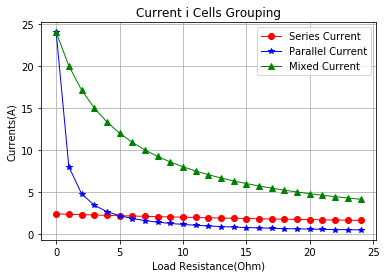

In [37]:
plt.plot(df.Resistance, df.SeriesCurrent,'-o',color='r',label='Series Current',lw=1) #lw= line width
plt.plot(df.Resistance, df.ParallelCurrent,'-*',color='b',label='Parallel Current',lw=1)
plt.plot(df.Resistance, df.MixedCurrent,'-^',color='g',label='Mixed Current',lw=1)
plt.xlabel("Load Resistance(Ohm)")
plt.ylabel("Currents(A)")
plt.legend()
plt.title("Variation of Current in Grouping of Cells")
plt.grid(True)